In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [27]:
#在统计学中，我们把从概率分布中抽取样本的过程称为抽样（sampling）。笼统来说，可以把分布（distribution）看作对事件的概率分配，稍后我们将给出的更正式定义。将概率分配给一些离散选择的分布称为多项分布（multinomial distribution）。
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 1., 0., 0., 0., 0.])

In [29]:
multinomial.Multinomial(10,fair_probs).sample()

tensor([1., 1., 2., 3., 0., 3.])

In [30]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000
# 相对频率作为估计值

tensor([0.1680, 0.1540, 0.1780, 0.1860, 0.1560, 0.1580])

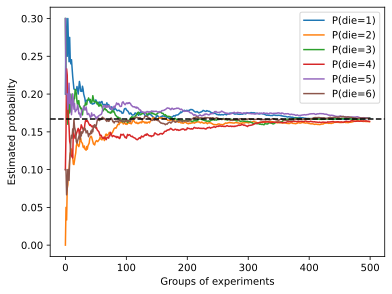

In [41]:
#让我们进行500组实验，每组抽取10个样本
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();